# Assignment 2 - Emergency Shelter Usage and Weather

## This notebook will analyze the emergency shelter usage vs. weather in May 2021. The main question of this dataset is if the usage of shelters increases during colder weather. I also would like to see if some shelters are more popular than others. The dataset itself is from Calgary, AB.
Author: Erin Paslawski

# 4 Shaping your data

#### 4a

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
sns.set()

#### 4b

In [2]:
all_df = pd.read_excel("May-2021-Calgary-Emergency-Shelters.xlsx")

In [3]:
all_df.head(6)

,Day,Actual High Temp,Actual Low Temp,CDIC - River Front (Combined) Capacity,CDIC - River Front (Combined) Overnight,CDIC - Hillhurst Centre 2507 - Emergency Capacity,CDIC - Hillhurst Centre 2507 - Emergency Overnight,CDIC - Days Inn Overflow Capacity,CDIC - Days Inn Overflow Overnight,CDIC - Main Site Capacity,...,Inn From the Cold - Family Shelter \n(3rd Floor) Total Overnight,Inn From the Cold - Family Shelter - Scattered Sites Capacity,Inn From the Cold - Family Shelter - Scattered Sites # of Rooms,Inn From the Cold - Family Shelter - Scattered Sites Total Overnight,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) Capacity,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) # of Rooms,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) Total Overnight,Brenda's House - Family Shelter Capacity,Brenda's House - Family Shelter # of Rooms,Brenda's House - Family Shelter Total Overnight
0,2021-05-01,12.9,1.0,490,379,56,51,28,20,7,...,2,36,8,3,4,1,0,60,14,3
1,2021-05-02,10.8,1.0,490,387,56,51,28,18,7,...,2,36,8,3,4,1,0,60,14,3
2,2021-05-03,13.3,-1.5,490,388,56,50,28,18,7,...,4,36,8,3,4,1,0,60,14,3
3,2021-05-04,12.5,2.4,490,383,56,51,28,17,7,...,4,36,8,0,4,1,0,60,14,0
4,2021-05-05,14.3,1.7,490,392,56,52,28,18,7,...,4,36,8,0,4,1,0,60,14,0
5,2021-05-06,19.7,2.7,490,388,56,53,28,18,7,...,4,36,8,0,4,1,0,60,14,0


#### 4 c i

In [4]:
weather_df = all_df[['Day', 'Actual High Temp', 'Actual Low Temp']].copy()

In [5]:
weather_df.head(5)

,Day,Actual High Temp,Actual Low Temp
0,2021-05-01,12.9,1.0
1,2021-05-02,10.8,1.0
2,2021-05-03,13.3,-1.5
3,2021-05-04,12.5,2.4
4,2021-05-05,14.3,1.7


4 c ii

In [6]:
shelters_df = (all_df.drop('Actual High Temp', axis=1)).drop('Actual Low Temp', axis=1)

In [7]:
shelters_df.head(5)

,Day,CDIC - River Front (Combined) Capacity,CDIC - River Front (Combined) Overnight,CDIC - Hillhurst Centre 2507 - Emergency Capacity,CDIC - Hillhurst Centre 2507 - Emergency Overnight,CDIC - Days Inn Overflow Capacity,CDIC - Days Inn Overflow Overnight,CDIC - Main Site Capacity,CDIC - Main Site Overnight,Salvation Army - Centre of Hope - Men's Emergency Capacity,...,Inn From the Cold - Family Shelter \n(3rd Floor) Total Overnight,Inn From the Cold - Family Shelter - Scattered Sites Capacity,Inn From the Cold - Family Shelter - Scattered Sites # of Rooms,Inn From the Cold - Family Shelter - Scattered Sites Total Overnight,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) Capacity,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) # of Rooms,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) Total Overnight,Brenda's House - Family Shelter Capacity,Brenda's House - Family Shelter # of Rooms,Brenda's House - Family Shelter Total Overnight
0,2021-05-01,490,379,56,51,28,20,7,2,80,...,2,36,8,3,4,1,0,60,14,3
1,2021-05-02,490,387,56,51,28,18,7,1,80,...,2,36,8,3,4,1,0,60,14,3
2,2021-05-03,490,388,56,50,28,18,7,3,80,...,4,36,8,3,4,1,0,60,14,3
3,2021-05-04,490,383,56,51,28,17,7,3,80,...,4,36,8,0,4,1,0,60,14,0
4,2021-05-05,490,392,56,52,28,18,7,2,80,...,4,36,8,0,4,1,0,60,14,0


#### 4 d

In [8]:
all_df['Day'] = all_df['Day'].dt.strftime('%m/%d')

I'm going to do this to the other 2 dataframes as well

In [9]:
weather_df['Day'] = weather_df['Day'].dt.strftime('%m/%d')

In [10]:
shelters_df['Day'] = shelters_df['Day'].dt.strftime('%m/%d')

In [11]:
all_df.head(5)

,Day,Actual High Temp,Actual Low Temp,CDIC - River Front (Combined) Capacity,CDIC - River Front (Combined) Overnight,CDIC - Hillhurst Centre 2507 - Emergency Capacity,CDIC - Hillhurst Centre 2507 - Emergency Overnight,CDIC - Days Inn Overflow Capacity,CDIC - Days Inn Overflow Overnight,CDIC - Main Site Capacity,...,Inn From the Cold - Family Shelter \n(3rd Floor) Total Overnight,Inn From the Cold - Family Shelter - Scattered Sites Capacity,Inn From the Cold - Family Shelter - Scattered Sites # of Rooms,Inn From the Cold - Family Shelter - Scattered Sites Total Overnight,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) Capacity,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) # of Rooms,Inn From the Cold - Family Shelter \n(2rd Floor Overflow) Total Overnight,Brenda's House - Family Shelter Capacity,Brenda's House - Family Shelter # of Rooms,Brenda's House - Family Shelter Total Overnight
0,05/01,12.9,1.0,490,379,56,51,28,20,7,...,2,36,8,3,4,1,0,60,14,3
1,05/02,10.8,1.0,490,387,56,51,28,18,7,...,2,36,8,3,4,1,0,60,14,3
2,05/03,13.3,-1.5,490,388,56,50,28,18,7,...,4,36,8,3,4,1,0,60,14,3
3,05/04,12.5,2.4,490,383,56,51,28,17,7,...,4,36,8,0,4,1,0,60,14,0
4,05/05,14.3,1.7,490,392,56,52,28,18,7,...,4,36,8,0,4,1,0,60,14,0


#### 4 e

In [12]:
all_df['CDIC River Front Capacity Percentage'] = all_df['CDIC - River Front (Combined) Overnight'] / all_df['CDIC - River Front (Combined) Capacity'] * 100

In [13]:
all_df['CDIC Hillhurst Centre 2507 Capacity Percentage'] = all_df['CDIC - Hillhurst Centre 2507 - Emergency Overnight'] / all_df['CDIC - Hillhurst Centre 2507 - Emergency Capacity'] * 100

In [14]:
all_df['CDIC Days Inn Capacity Percentage'] = all_df['CDIC - Days Inn Overflow Overnight'] / all_df['CDIC - Days Inn Overflow Capacity'] * 100

In [15]:
all_df['CDIC Main Site Capacity Percentage'] = all_df['CDIC - Main Site Overnight'] / all_df['CDIC - Main Site Capacity'] * 100

In [16]:
all_df[['Day','CDIC River Front Capacity Percentage','CDIC Hillhurst Centre 2507 Capacity Percentage','CDIC Days Inn Capacity Percentage','CDIC Main Site Capacity Percentage']].head(5)

,Day,CDIC River Front Capacity Percentage,CDIC Hillhurst Centre 2507 Capacity Percentage,CDIC Days Inn Capacity Percentage,CDIC Main Site Capacity Percentage
0,05/01,77.346939,91.071429,71.428571,28.571429
1,05/02,78.979592,91.071429,64.285714,14.285714
2,05/03,79.183673,89.285714,64.285714,42.857143
3,05/04,78.163265,91.071429,60.714286,42.857143
4,05/05,80.000000,92.857143,64.285714,28.571429


# 5 - Building visulaizations using Python Libraries

#### 5 a

<AxesSubplot:xlabel='Day', ylabel='Actual High Temp'>

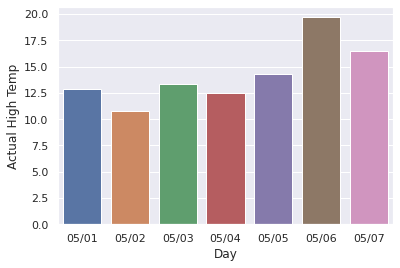

In [17]:
sns.barplot(x=weather_df.head(7)['Day'],y=weather_df['Actual High Temp'])

#### 5 b

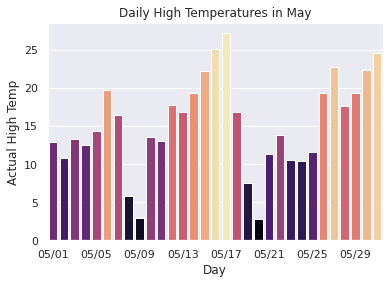

In [18]:

pal = sns.color_palette('magma', len(weather_df['Actual High Temp']))

rank = weather_df['Actual High Temp'].argsort().argsort()
b= sns.barplot(x=weather_df['Day'],y=weather_df['Actual High Temp'], palette = np.array(pal[::1])[rank])
# used this post to try to get the colour matching with the temp
# https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
b.set_title("Daily High Temperatures in May")
b.xaxis.set_major_locator(ticker.MultipleLocator(4))


#### 5 c

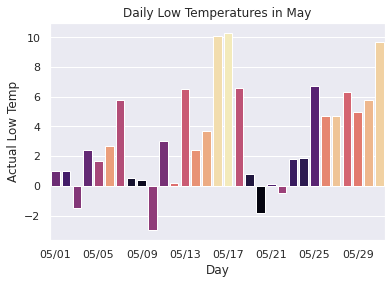

In [19]:
pal = sns.color_palette('magma', len(weather_df['Actual Low Temp']))

rank = weather_df['Actual High Temp'].argsort().argsort()
b= sns.barplot(x=weather_df['Day'],y=weather_df['Actual Low Temp'], palette = np.array(pal[::1])[rank])
# used this post to try to get the colour matching with the temp
# https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
b.set_title("Daily Low Temperatures in May")
b.xaxis.set_major_locator(ticker.MultipleLocator(4))

#### 5 d

Text(0.5, 1.0, 'Percentage Occupancy Rate of CDIC River Front Shelter in May 2021')

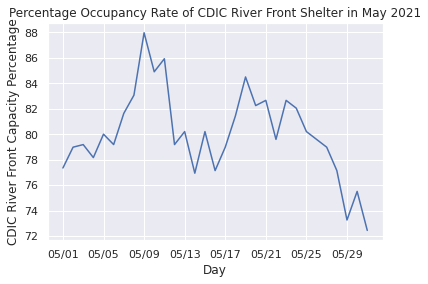

In [20]:
lc = sns.lineplot(x = "Day", y="CDIC River Front Capacity Percentage",data=all_df)
lc.xaxis.set_major_locator(ticker.MultipleLocator(4))
lc.set_title("Percentage Occupancy Rate of CDIC River Front Shelter in May 2021")


#### 5 e

In [21]:
temp_df= all_df.sort_values('Actual Low Temp', ascending=True)
temp_df[['Day','CDIC River Front Capacity Percentage','CDIC Hillhurst Centre 2507 Capacity Percentage','CDIC Days Inn Capacity Percentage','CDIC Main Site Capacity Percentage']].head(1)

,Day,CDIC River Front Capacity Percentage,CDIC Hillhurst Centre 2507 Capacity Percentage,CDIC Days Inn Capacity Percentage,CDIC Main Site Capacity Percentage
9,05/10,84.897959,91.071429,60.714286,28.571429


#### 5 f

Text(0.5, 1.0, 'Percentage Occupancy Rate of CDIC Hillhurst Centre Shelter in May 2021')

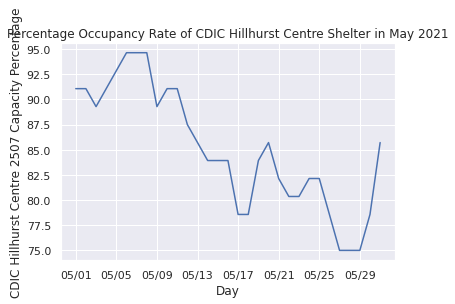

In [22]:
lc = sns.lineplot(x = "Day", y='CDIC Hillhurst Centre 2507 Capacity Percentage',data=all_df)
lc.xaxis.set_major_locator(ticker.MultipleLocator(4))
lc.set_title("Percentage Occupancy Rate of CDIC Hillhurst Centre Shelter in May 2021")

Text(0.5, 1.0, 'Percentage Occupancy Rate of CDIC Days Inn Shelter in May 2021')

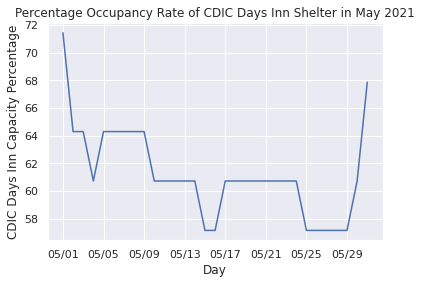

In [23]:
lc = sns.lineplot(x = "Day", y='CDIC Days Inn Capacity Percentage',data=all_df)
lc.xaxis.set_major_locator(ticker.MultipleLocator(4))
lc.set_title("Percentage Occupancy Rate of CDIC Days Inn Shelter in May 2021")

Text(0.5, 1.0, 'Percentage Occupancy Rate of CDIC Main Site Shelter in May 2021')

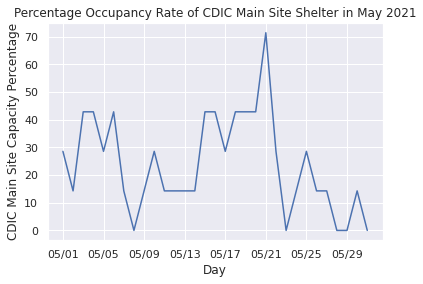

In [24]:
lc = sns.lineplot(x = "Day", y='CDIC Main Site Capacity Percentage',data=all_df)
lc.xaxis.set_major_locator(ticker.MultipleLocator(4))
lc.set_title("Percentage Occupancy Rate of CDIC Main Site Shelter in May 2021")

#### 5 g

##### a

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percent Occupancy')]

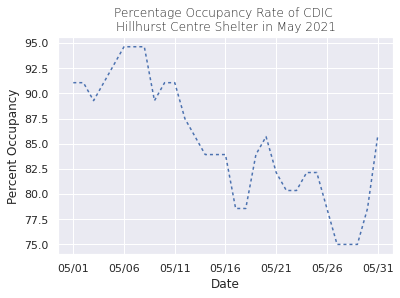

In [25]:
lc = sns.lineplot(x = "Day", y='CDIC Hillhurst Centre 2507 Capacity Percentage',data=all_df,style=True, dashes=[(2,2)], legend = False)
lc.xaxis.set_major_locator(ticker.MultipleLocator(5))
lc.set_title("Percentage Occupancy Rate of CDIC \nHillhurst Centre Shelter in May 2021", fontsize=12,fontweight=2)
lc.set(xlabel='Date', ylabel = 'Percent Occupancy')

For this first plot, I changed:
1. Font size and wrap of the title.
2. Name of the x and y axis labels
3. Linetype - it is now a dashed line. I had to hide the legend for this as well.

##### b

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percent Occupancy')]

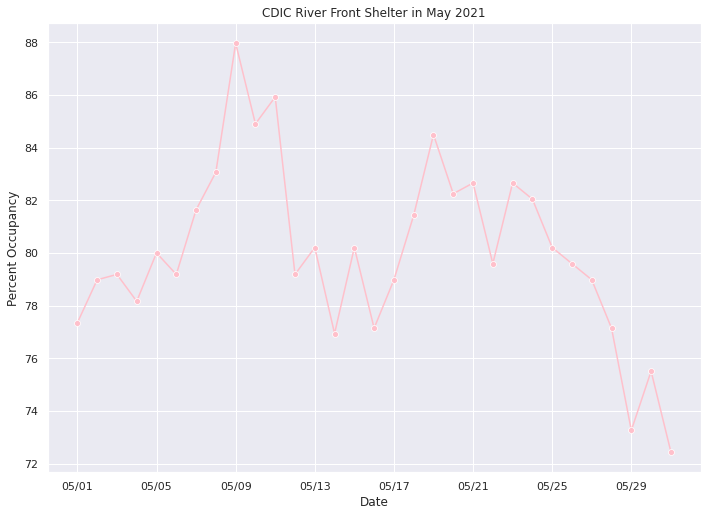

In [26]:
sns.set_style("dark")
sns.set(rc={'figure.figsize':(11.7,8.27)})
lc = sns.lineplot(x = "Day", y="CDIC River Front Capacity Percentage",data=all_df,marker="o",color='pink')
lc.xaxis.set_major_locator(ticker.MultipleLocator(4))
lc.set_title("CDIC River Front Shelter in May 2021")
lc.set(xlabel='Date', ylabel = 'Percent Occupancy')

For the River Front plot, I changed:
1. Added markers for each data point.
2. Changed background/style to 'dark', which also removed tick marks
3. Changed line colour.
4. Made the plot bigger

##### c

Text(0.5, 1.05, 'Percentage Occupancy Rate of CDIC Days Inn Shelter in May 2021')

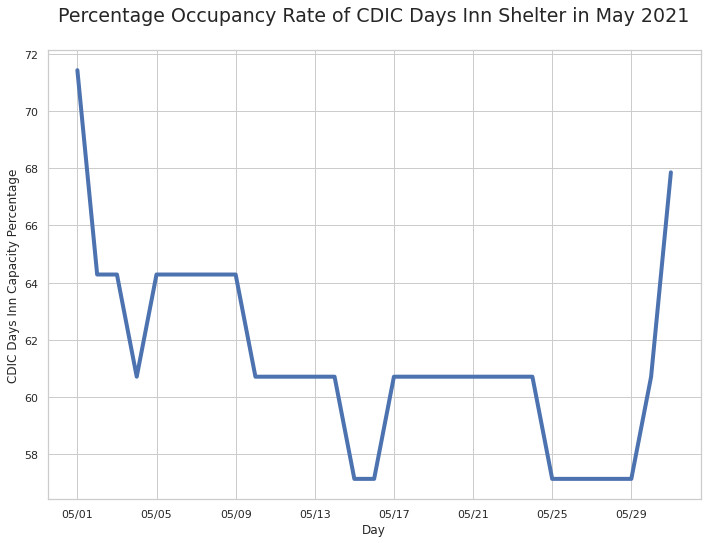

In [27]:
sns.set_style("whitegrid")
lc = sns.lineplot(x = "Day", y='CDIC Days Inn Capacity Percentage',data=all_df,linewidth = 4)
lc.xaxis.set_major_locator(ticker.MultipleLocator(4))
lc.set_title("Percentage Occupancy Rate of CDIC Days Inn Shelter in May 2021", fontsize = 19,y=1.05)




For the Days Inn plot, I changed:
1. Made line thicker
2. Changed the stye to 'whitegrid' to show grid marks
3. Changed the size of the title to fit the larger plot and raised it higher


##### d

[(0.0, 100.0)]

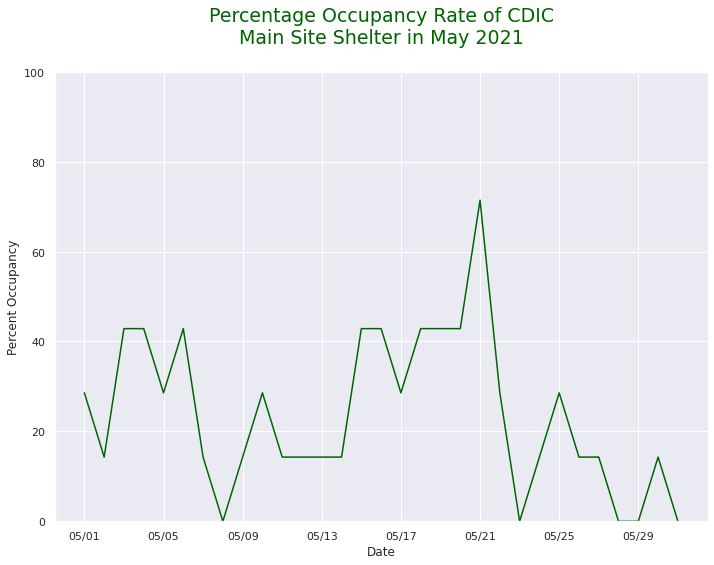

In [30]:
sns.set_style("darkgrid")
sns.set_palette("cubehelix")
sns.despine()
lc = sns.lineplot(x='Day',
                  y='CDIC Main Site Capacity Percentage',
                  data=all_df,
                  color='darkgreen')
lc.xaxis.set_major_locator(ticker.MultipleLocator(4))
lc.set_title("Percentage Occupancy Rate of CDIC\nMain Site Shelter in May 2021", 
             fontsize = 19,
             y=1.05,
             color='darkgreen')
lc.set(xlabel='Date', 
       ylabel = 'Percent Occupancy')
lc.set(ylim=(0,100)) 


For the Main Site plot, I changed:
1. Line color and Title colour
2. Style to be a darker grid
3. Changed the y-axis range. This shows the general occupancy rate- it doesn't do as well about highlighting daily changes.

### 6

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percent Occupancy')]

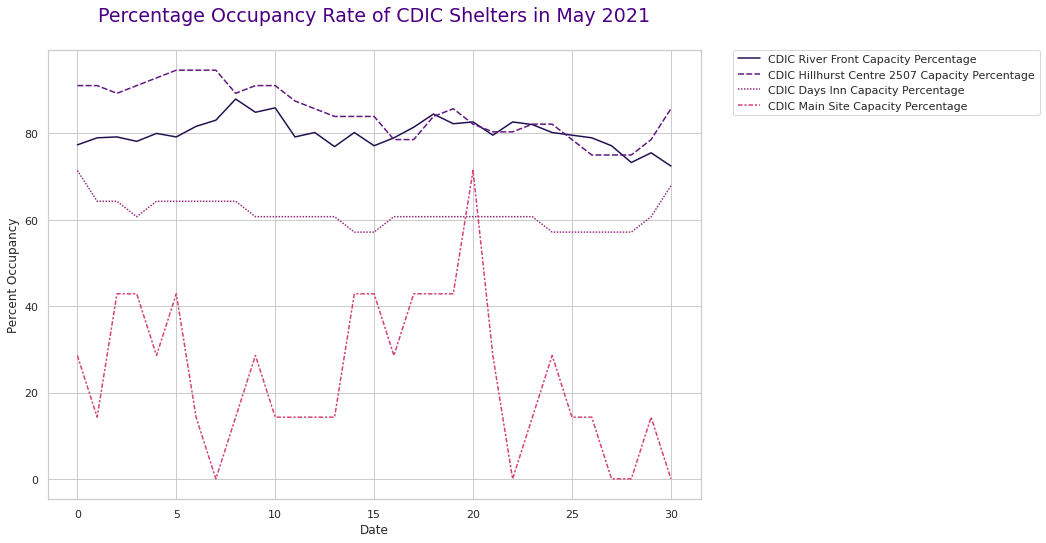

In [32]:
sns.set_style("whitegrid")
sns.set_palette("magma")
plt = sns.lineplot(data=all_df[['Day','CDIC River Front Capacity Percentage',
                                'CDIC Hillhurst Centre 2507 Capacity Percentage',
                                'CDIC Days Inn Capacity Percentage',
                                'CDIC Main Site Capacity Percentage']])
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title("Percentage Occupancy Rate of CDIC Shelters in May 2021", 
             fontsize = 19,
             y=1.05,
             color='indigo')
plt.set(xlabel='Date', 
       ylabel = 'Percent Occupancy')